#Setup

In [ ]:
!apt-get install ffmpeg freeglut3-dev xvfb  # For visualization
!pip install "stable-baselines3[extra]>=2.0.0a4"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  freeglut3 libegl-dev libfontenc1 libgl-dev libgl1-mesa-dev libgles-dev libgles1 libglu1-mesa
  libglu1-mesa-dev libglvnd-core-dev libglvnd-dev libglx-dev libice-dev libopengl-dev libsm-dev
  libxfont2 libxkbfile1 libxt-dev x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
Suggested packages:
  libice-doc libsm-doc libxt-doc
The following NEW packages will be installed:
  freeglut3 freeglut3-dev libegl-dev libfontenc1 libgl-dev libgl1-mesa-dev libgles-dev libgles1
  libglu1-mesa libglu1-mesa-dev libglvnd-core-dev libglvnd-dev libglx-dev libice-dev libopengl-dev
  libsm-dev libxfont2 libxkbfile1 libxt-dev x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 25 newly installed, 0 to remove and 49 not upgraded.
Need t

In [ ]:
!pip install --upgrade gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.5/965.5 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0
    Uninstalling gymnasium-1.0.0:
      Successfully uninstalled gymnasium-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.6.0a1 requires gymnasium<1.1.0,>=0.29.1, but you have gymnasium 1.1.0 which is incompatible.


In [ ]:
import gymnasium as gym
import numpy as np
from gymnasium import spaces
from stable_baselines3.common.env_checker import check_env


In [ ]:
!pip install tensorflow

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
torchvision 0.20.1+cu121 requires torch==2.5.1, but you have torch 2.6.0 which is incompatible.


In [ ]:
!pip uninstall -y numpy
!pip install --no-cache-dir numpy
!pip install --no-cache-dir --force-reinstall gymnasium stable-baselines3


Found existing installation: numpy 2.2.3
Uninstalling numpy-2.2.3:
  Successfully uninstalled numpy-2.2.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 2.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
langchain 0.3.12 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.3 which is incompatible.
pytensor 2.26.4 requires numpy<2,>=1.17.0, but you have numpy 2.2.3 which is inc

#Environment

In [ ]:
def seasonal_duck_curve(hour, season, noise_scale=0.03):
    """ Computes electricity demand based on seasonal duck curve """
    A = 400
    seasonal_params = {
        1: (100, 7, 80, 12, 120, 14, 250, 18, 30, 4),  # Summer
        2: (180, 6, 40, 12, 80, 14, 220, 17, 60, 4),  # Winter
        3: (130, 7, 90, 12, 100, 14, 180, 18, 40, 4)  # Spring/Autumn
    }
    B, t_morning, C, t_dip, D, mu_dip, E, t_evening, F, t_early = seasonal_params[season]
    demand = A + B / (1 + np.exp(-1 * (hour - t_morning))) - C / (1 + np.exp(-1 * (hour - t_dip))) - D * np.exp(-((hour - mu_dip)**2) / 4) + E / (1 + np.exp(-1 * (hour - t_evening)))
    return demand * random.uniform(0.9, 1.1)

def electricity_price_function(hour, season, demand, noise_scale=0.03):
    """ Computes electricity price based on seasonal demand """
    season_params = {
        1: (30, 15, 10),  # Summer
        2: (28, 14, 9),   # Winter
        3: (25, 12, 8)    # Spring/Autumn
    }
    A_q, B_q, C_q = season_params[season]
    base_price = A_q + B_q * np.cos(2 * np.pi * hour / 24) + C_q * np.cos(4 * np.pi * hour / 24)
    return max(base_price * random.uniform(0.9, 1.1), 0)


In [ ]:
import gymnasium as gym
import numpy as np
from gymnasium import spaces
import random

class ElectricityMarketEnv(gym.Env):
    """
    Custom Gym environment for an electricity market with battery storage.
    The agent decides when to charge/discharge to maximize profit.
    """
    def __init__(self, max_timesteps=365, degradation_rate=0.99):
        super(ElectricityMarketEnv, self).__init__()
        self.timestep = 0
        self.max_timesteps = max_timesteps
        self.season = self.get_season_from_timestep(0)  # Set initial season based on real months
        self.episode_count = 0  # Track training episodes
        self.degradation_rate = degradation_rate  # Battery degradation factor

        # Battery parameters
        self.initial_battery_capacity = 100  # Initial max storage capacity
        self.battery_capacity = self.initial_battery_capacity  # Maximum storage capacity
        self.battery_soc = 50  # Initial state of charge (SoC)
        self.efficiency = 0.95  # Charging/discharging efficiency

        # Electricity market parameters
        self.base_min_price, self.base_max_price = self._calculate_price_bounds()
        self.base_min_demand, self.base_max_demand = self._calculate_demand_bounds()

        self.min_price, self.max_price = self.base_min_price * 0.9, self.base_max_price * 1.1
        self.min_demand, self.max_demand = self.base_min_demand * 0.9, self.base_max_demand * 1.1


        # Action space: Charge (+) or discharge (-) within battery capacity
        self.action_space = spaces.Box(low=-self.battery_capacity, high=self.battery_capacity, shape=(1,), dtype=np.float32)

        # Observation space: [Battery SoC, Battery Capacity, Electricity Price, Demand, Hour, Season]
        self.observation_space = spaces.Box(
            low=np.array([0, 50, self.min_price, self.min_demand, 0, 1], dtype=np.float32),
            high=np.array([self.initial_battery_capacity, self.initial_battery_capacity, self.max_price, self.max_demand, 23, 3], dtype=np.float32),
            dtype=np.float32
        )

        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.battery_capacity = self.initial_battery_capacity  # Reset battery capacity
        self.timestep = 0
        self.battery_soc = 50  # Reset battery SoC
        self.season = self.get_season_from_timestep(self.timestep)  # Set season dynamically
        self.episode_count += 1  # Track episode count
        return self._get_state(), {}

    def step(self, action):
        """
        Executes one step in the environment.
        Action: Charge (>0) or discharge (<0) electricity.
        """
        self.timestep += 1
        self.season = self.get_season_from_timestep(self.timestep)
        done = self.timestep >= self.max_timesteps or self.battery_soc <= 0

        self.battery_capacity *= self.degradation_rate
        self.battery_capacity = max(self.battery_capacity, 50)  # Minimum capacity limit

        # Get new price and demand based on season
        hour = self.timestep % 24
        demand = seasonal_duck_curve(hour, self.season)
        price = electricity_price_function(hour, self.season, demand)

        # Clip action to valid range (-battery_capacity, +battery_capacity)
        action = np.clip(action[0], -self.battery_capacity, self.battery_capacity)

        # Charge/discharge the battery
        if action > 0:  # Charging (cost money)
            charge_amount = min(action, self.battery_capacity - self.battery_soc)
            cost = charge_amount * price / self.efficiency
            self.battery_soc += charge_amount * self.efficiency
            reward = -cost  # Negative reward for spending money
            #print(f"Step {self.timestep}, Season: {self.get_season_name(self.season)}: Charging {charge_amount:.2f} units at price {price:.2f}. Cost: {cost:.2f}. SoC: {self.battery_soc:.2f}.")
        else:  # Discharging (sell to market)
            discharge_amount = min(-action, self.battery_soc, demand)
            revenue = discharge_amount * price * self.efficiency
            self.battery_soc -= discharge_amount / self.efficiency
            reward = revenue  # Positive reward for selling
            #print(f"Step {self.timestep}, Season: {self.get_season_name(self.season)}: Discharging {discharge_amount:.2f} units at price {price:.2f}. Revenue: {revenue:.2f}. SoC: {self.battery_soc:.2f}.")

        next_state = np.array([self.battery_soc, self.battery_capacity, price, demand, hour, self.season], dtype=np.float32)
        return next_state, reward, done, False, {}

    def _get_state(self):
        """ Returns the current state: [SoC, Price, Demand, Hour, Season] """
        hour = self.timestep % 24
        demand = seasonal_duck_curve(hour, self.season)
        price = electricity_price_function(hour, self.season, demand)
        #print(f"State - SoC: {self.battery_soc:.2f}, Price: {price:.2f}, Demand: {demand:.2f}, Hour: {hour}, Season: {self.season}.")
        return np.array([self.battery_soc, self.battery_capacity, price, demand, hour, self.season], dtype=np.float32)



    def get_season_from_timestep(self, timestep):
        """ Determines season based on day of the year """
        month = (timestep // 30) % 12  # Approximate month from timestep
        if month in [11, 0, 1]:
            return 2  # Winter
        elif month in [5, 6, 7]:
            return 1  # Summer
        else:
            return 3  # Spring/Autumn

    def get_season_name(self, season):
        return {1: "Summer", 2: "Winter", 3: "Spring/Autumn"}.get(season, "Unknown")


    def evaluate_agent(self, agent, num_episodes=3):
        """ Evaluates the agent over multiple episodes and prints performance metrics per season. """
        total_rewards = []
        season_rewards = {1: [], 2: [], 3: []}

        for ep in range(num_episodes):
            state, _ = self.reset()
            done = False
            episode_reward = 0
            seasonal_reward = {1: 0, 2: 0, 3: 0}

            while not done:
                action, _ = agent.predict(state)
                state, reward, done, _, _ = self.step(action)
                episode_reward += reward
                seasonal_reward[self.season] += reward

            total_rewards.append(episode_reward)
            for season in seasonal_reward:
                season_rewards[season].append(seasonal_reward[season])

            print(f"Episode {ep + 1}: Total Reward = {episode_reward:.2f}")

        avg_reward = np.mean(total_rewards)
        avg_seasonal_rewards = {season: np.mean(rewards) if rewards else 0 for season, rewards in season_rewards.items()}

        print(f"\nEvaluation Results:")
        print(f"Average Reward over {num_episodes} episodes: {avg_reward:.2f}")
        print(f"Seasonal Performance:")
        for season, avg in avg_seasonal_rewards.items():
            print(f"  {self.get_season_name(season)}: {avg:.2f}")

        return avg_reward, avg_seasonal_rewards

    def _calculate_price_bounds(self):
        """ Determine min/max price dynamically based on electricity_price_function """
        min_price = float('inf')
        max_price = float('-inf')
        for season in [1, 2, 3]:
            for hour in range(24):
                demand = seasonal_duck_curve(hour, season)
                price = electricity_price_function(hour, season, demand)
                min_price = min(min_price, price)
                max_price = max(max_price, price)
        return min_price, max_price

    def _calculate_demand_bounds(self):
        """ Determine min/max demand dynamically based on seasonal_duck_curve """
        min_demand = float('inf')
        max_demand = float('-inf')
        for season in [1, 2, 3]:
            for hour in range(24):
                demand = seasonal_duck_curve(hour, season)
                min_demand = min(min_demand, demand)
                max_demand = max(max_demand, demand)
        return min_demand, max_demand



In [ ]:
env = ElectricityMarketEnv()
obs, _ = env.reset()



#Evaluation Functions


In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy


In [ ]:
%pip install tensorboard
%load_ext tensorboard


In [ ]:
import time
import numpy as np
import tensorflow as tf
from stable_baselines3.common.callbacks import BaseCallback

class RLComparisonCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(RLComparisonCallback, self).__init__(verbose)
        self.start_time = time.time()

    def _on_training_start(self) -> None:
        self.episode_rewards = []
        self.episode_lengths = []
        self.total_timesteps = 0

    def _on_step(self) -> bool:
        if self.locals.get("dones") is not None:
            for done, reward, info in zip(self.locals["dones"], self.locals["rewards"], self.locals["infos"]):
                if done:
                    episode_reward = info.get("episode", {}).get("r", reward)
                    episode_length = info.get("episode", {}).get("l", 0)

                    self.episode_rewards.append(episode_reward)
                    self.episode_lengths.append(episode_length)
                    self.total_timesteps += episode_length

                    # Logging metrics after each episode using log scale
                    avg_reward = np.mean(self.episode_rewards[-100:])
                    cum_reward = np.sum(self.episode_rewards)
                    discounted_reward = np.sum([r * (0.99 ** i) for i, r in enumerate(self.episode_rewards)])
                    convergence_rate = np.std(self.episode_rewards[-100:])
                    sample_efficiency = cum_reward / max(1, self.total_timesteps)
                    stability = np.std(self.episode_rewards)
                    policy_entropy = info.get('entropy', 0)
                    time_complexity = time.time() - self.start_time
                    space_complexity = self.model.policy.parameters_to_vector().nbytes

                    self.logger.record("custom/average_reward", avg_reward)
                    self.logger.record("custom/cumulative_reward", cum_reward)
                    self.logger.record("custom/discounted_reward", discounted_reward)
                    self.logger.record("custom/convergence_rate", convergence_rate)
                    self.logger.record("custom/sample_efficiency", sample_efficiency)
                    self.logger.record("custom/stability", stability)
                    self.logger.record("custom/policy_entropy", policy_entropy)
                    self.logger.record("custom/time_complexity", time_complexity)
                    self.logger.record("custom/space_complexity", space_complexity)

        return True


#Lets start with training

In [ ]:
SEEDS = [ 33, 2, 5, 6, 7, 9, 305, 47, 87, 97, 23, 17, 19]
SEEDS = [ 705, 454]
steps = 1000000

In [ ]:
from stable_baselines3 import PPO, A2C, SAC, TD3, DDPG

In [ ]:
from stable_baselines3.common.callbacks import CheckpointCallback, CallbackList

In [ ]:
%%time
model_type = "PPO"
for seed in SEEDS:
  env.reset(seed=seed)

  checkpoint_callback = CheckpointCallback(
      save_freq=2000000,  # Save every 100,000 steps
      save_path='./models_ppo/',  # Directory to save the model
      name_prefix=f"{model_type}_{seed}_{steps}"  # Prefix for the saved model files
  )
  ppo_callback = CallbackList([RLComparisonCallback(), checkpoint_callback])
  print(seed)
  ppo_model = PPO("MlpPolicy", env, verbose=0, tensorboard_log="./tensorboard/", learning_rate=np.random.uniform(1e-5, 1e-3),  seed=seed).learn(steps, callback=ppo_callback, tb_log_name=f"{model_type}_{seed}_{steps}")
  ppo_model.save(f"./models_ppo/{model_type}_{seed}_{steps}")

705
454


KeyboardInterrupt: 

In [ ]:
!zip -r models_ppo.zip models_ppo/

updating: models_ppo/ (stored 0%)
  adding: models_ppo/PPO_47_1000000.zip (stored 0%)
  adding: models_ppo/PPO_305_1000000.zip (stored 0%)
  adding: models_ppo/PPO_19_1000000.zip (stored 0%)
  adding: models_ppo/PPO_23_1000000.zip (stored 0%)
  adding: models_ppo/PPO_97_1000000.zip (stored 0%)
  adding: models_ppo/PPO_17_1000000.zip (stored 0%)
  adding: models_ppo/PPO_87_1000000.zip (stored 0%)
  adding: models_ppo/PPO_9_1000000.zip (stored 0%)


In [ ]:
env.evaluate_agent(ppo_model, num_episodes=365)

#PPO

In [ ]:
from sklearn.preprocessing import normalize
import numpy as np

def get_weights(model_rewards):
    model_rewards = np.array(model_rewards)

    # Prevent large values from exploding
    max_reward = np.max(model_rewards)
    stable_rewards = model_rewards - max_reward  # Shift values

    exp_rewards = np.exp(stable_rewards)  # Now safe to exponentiate
    weights = normalize(exp_rewards.reshape(1, -1), norm='l1')  # Normalize

    return weights.flatten()

In [ ]:
%%time
import gym
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common import base_class
from typing import List

class AdvancedPPOBagging:
    def __init__(self, env: gym.Env, n_models: int = 10, timesteps: int = 10000):
        self.env = env
        self.n_models = n_models
        self.timesteps = timesteps
        self.models: List[base_class.BaseAlgorithm] = []
        self.model_rewards: List[float] = []  # To store rewards of each model

    def train(self):
        env = self.env
        for i in range(self.n_models):
            # Train each PPO model with slightly different hyperparameters
            env.reset()
            model = PPO("MlpPolicy", env, learning_rate=np.random.uniform(1e-5, 1e-3), verbose=0)
            model.learn(total_timesteps=self.timesteps)
            self.models.append(model)
            print(i)
            # Evaluate and record performance
            reward = self.evaluate_model(model)
            self.model_rewards.append(reward)

    def calc_rewards(self):
        for model in self.models:
            reward = self.evaluate_model(model)
            self.model_rewards.append(reward)

    def evaluate_model(self, model: base_class.BaseAlgorithm):
        total_reward = 0
        vec_env = model.get_env()
        obs = vec_env.reset()
        all_episode_rewards = []
        num_episodes = 100
        for _ in range(num_episodes):
            episode_rewards = []
            done = False
            while not done:
                action, _states = model.predict(obs)
                obs, reward, done, _ = vec_env.step(action)
                total_reward += reward
        return total_reward / num_episodes  # Average reward

    def _predict(self, obs):
        # Calculate weights based on model performance (higher reward -> higher weight)
        weights = np.array(self.model_rewards) / np.sum(self.model_rewards)
        weights = weights.flatten()  # Ensure it's 1D

        # Collect predictions from all models (each prediction is a pair)
        predictions = np.array([model.predict(obs)[0] for model in self.models])  # Shape: (n_models, 2)
        predictions = np.squeeze(predictions, axis=1)  # Now shape: (10, 2)


       # Expect (n_models,)

        # Perform weighted average along axis 0 (model-wise) for both fields
        weighted_prediction = np.average(predictions, axis=0, weights=weights)
        return np.array([weighted_prediction]), _

    def predict(self, obs):
        weights = get_weights(self.model_rewards)

        # Collect predictions from all models (each prediction is a pair)
        predictions = np.array([model.predict(obs)[0] for model in self.models])  # Shape: (n_models, 2)
        predictions = np.squeeze(predictions, axis=1)  # Now shape: (10, 2)


       # Expect (n_models,)

        # Perform weighted average along axis 0 (model-wise) for both fields
        weighted_prediction = np.average(predictions, axis=0, weights=weights)
        return np.array([weighted_prediction]), None



CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 45.8 µs


In [ ]:

def get_rewards(
    model,
    num_episodes: int = 100,
    deterministic: bool = True,
) -> float:
    # This function will only work for a single environment
    vec_env = PPO("MlpPolicy", env, learning_rate=np.random.uniform(1e-5, 1e-3), verbose=0).get_env()
    obs = vec_env.reset()
    all_episode_rewards = []
    for _ in range(num_episodes):
        episode_rewards = []
        done = False
        while not done:
            # _states are only useful when using LSTM policies
            # `deterministic` is to use deterministic actions
            action, _states = model.predict(obs)
            # here, action, rewards and dones are arrays
            # because we are using vectorized env
            obs, reward, done, _info = vec_env.step(action)
            episode_rewards.append(reward)

        all_episode_rewards.append(sum(episode_rewards))
    return all_episode_rewards

In [ ]:
def evaluate(
    model,
    num_episodes: int = 100,
    deterministic: bool = True,
) -> float:
  all_episode_rewards = get_rewards(model, num_episodes, deterministic)
  mean_episode_reward = np.mean(all_episode_rewards)
  print(f"Mean reward: {mean_episode_reward:.2f} - Num episodes: {num_episodes}")


In [ ]:
%%time
bagging_agent_10 = AdvancedPPOBagging(env, n_models=1)
bagging_agent_10.train()

0
CPU times: user 6min 58s, sys: 868 ms, total: 6min 59s
Wall time: 42.1 s


In [ ]:
evaluate(bagging_agent_10)


Mean reward: 1248.88 - Num episodes: 100


In [ ]:
env.evaluate_agent(bagging_agent_10, num_episodes=365)

In [ ]:
save_models(bagging_agent_10, "ppoensamble10")
a = load_models("ppoensamble10", env, 10)
evaluate(a)

Models and results saved to ppoensamble10
Models and results loaded from ppoensamble10
Mean reward: 2666679552.00 - Num episodes: 100


In [ ]:
import numpy as np
import os

def save_models(model, filename: str):
    models, model_rewards, = model.models, model.model_rewards
    # Save the models' weights (rather than the whole model)
    os.makedirs(filename, exist_ok=True)

    # Save models
    for i, model in enumerate(models):
        model.save(f"{filename}_model_{i}")

    # Save model rewards
    np.savez(f"{filename}_results.npz", model_rewards=model_rewards)
    print(f"Models and results saved to {filename}")

def load_models(filename: str, env: gym.Env, n_models: int):
    models = []

    # Load the models
    for i in range(n_models):
        model = PPO.load(f"{filename}_model_{i}", env=env)
        models.append(model)

    # Load the results (rewards)
    results_data = np.load(f"{filename}_results.npz")
    model_rewards = results_data['model_rewards']

    print(f"Models and results loaded from {filename}")
    m = AdvancedPPOBagging(env, n_models=n_models)
    m.models = models
    m.model_rewards = model_rewards
    return m


In [ ]:
env.reset(seed=SEED)
bagging_agent_50 = AdvancedPPOBagging(env, n_models=50)
bagging_agent_50.train()
save_models(bagging_agent_50, "ppoensamble50")
evaluate(bagging_agent_50)


In [ ]:
env.reset(seed=SEED)
bagging_agent_100 = AdvancedPPOBagging(env, n_models=100)
bagging_agent_100.train()
save_models(bagging_agent_100, "ppoensamble100")
evaluate(bagging_agent_100)


In [ ]:
env.reset(seed=SEED)
bagging_agent_200 = AdvancedPPOBagging(env, n_models=200)
bagging_agent_200.train()
save_models(bagging_agent_200, "ppoensamble200")
evaluate(bagging_agent_200)


In [ ]:
env.reset(seed=SEED)
bagging_agent_500 = AdvancedPPOBagging(env, n_models=500)
bagging_agent_500.train()
save_models(bagging_agent_500, "ppoensamble500")
evaluate(bagging_agent_500)


In [ ]:
env.reset(seed=SEED)
bagging_agent_1000 = AdvancedPPOBagging(env, n_models=1000)
bagging_agent_1000.train()
save_models(bagging_agent_1000, "ppoensamble1000")
evaluate(bagging_agent_1000)


#Comparison

In [ ]:
!pip install absl-py==2.1.0 astunparse==1.6.3 certifi==2025.1.31 charset-normalizer==3.4.1 cloudpickle==3.1.1 contourpy==1.3.1 cycler==0.12.1 Farama-Notifications==0.0.4 filelock==3.17.0 flatbuffers==25.2.10 fonttools==4.56.0 fsspec==2025.2.0 gast==0.6.0 google-pasta==0.2.0 grpcio==1.70.0 gymnasium==1.0.0 h5py==3.13.0 idna==3.10 Jinja2==3.1.5 keras==3.8.0 kiwisolver==1.4.8 libclang==18.1.1 Markdown==3.7 markdown-it-py==3.0.0 MarkupSafe==3.0.2 matplotlib==3.10.0 mdurl==0.1.2 ml-dtypes==0.4.1 mpmath==1.3.0 namex==0.0.8 networkx==3.4.2 numpy==2.0.2 opt_einsum==3.4.0 optree==0.14.0 packaging==24.2 pandas==2.2.3 pillow==11.1.0 pip==23.2.1 protobuf==5.29.3 Pygments==2.19.1 pyparsing==3.2.1 python-dateutil==2.9.0.post0 pytz==2025.1 requests==2.32.3 rich==13.9.4 setuptools==75.8.1 six==1.17.0 stable_baselines3==2.5.0 sympy==1.13.1 tensorboard==2.18.0 tensorboard-data-server==0.7.2 tensorflow==2.18.0 tensorflow_intel==2.18.0 termcolor==2.5.0 torch==2.6.0 typing_extensions==4.12.2 tzdata==2025.1 urllib3==2.3.0 Werkzeug==3.1.3 wheel==0.45.1 wrapt==1.17.2


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using cached charset_normalizer-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (35 kB)
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached fonttools-4.56.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached fsspec-2025.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached grpcio-1.70.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
  Using cached h5py-3.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata 

In [ ]:
!pip install stable_baselines3==2.5.0

  Using cached stable_baselines3-2.5.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached gymnasium-1.0.0-py3-none-any.whl.metadata (9.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 950.9 kB/s eta 0:00:00
Using cached gymnasium-1.0.0-py3-none-any.whl (958 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.1.0
    Uninstalling gymnasium-1.1.0:
      Successfully uninstalled gymnasium-1.1.0
  Attempting uninstall: stable_baselines3
    Found existing installation: stable_baselines3 2.6.0a1
    Uninstalling stable_baselines3-2.6.0a1:
      Successfully uninstalled stable_baselines3-2.6.0a1


In [ ]:
!pip install torch==2.6.0

In [ ]:
!unzip models_ppo.zip

Archive:  models_ppo.zip
replace tensorboard/PPO_87_1000000_1/events.out.tfevents.1740743746.eda3dc86ebe0.146.3? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
ppo_model = PPO("MlpPolicy", env, verbose=0, tensorboard_log="./tensorboard/", learning_rate=np.random.uniform(1e-5, 1e-3))

In [ ]:
import glob
import random

models_dir = "./models_ppo"
reward =0
model_files = glob.glob(models_dir + "/*.zip")
ensamble_sizes = [2,4,8,16]
results = { index : [] for index in ensamble_sizes}
number_of_models_per_size = 10
for ensamble_size in ensamble_sizes:
  for model_num in range(number_of_models_per_size):
      selected_models = random.sample(model_files, ensamble_size)
      models = [ PPO.load(model_file, env=env,  custom_objects={'observation_space': ppo_model.observation_space, 'action_space': ppo_model.action_space} ) for model_file in selected_models]
      model = AdvancedPPOBagging(env, n_models=ensamble_size)
      model.models = models
      model.calc_rewards()
      reward = evaluate(model)
      results[ensamble_size].append(reward)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 2852.93 - Num episodes: 100
Mean reward: 3873.00 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 3841.35 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 7934.52 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 7949.65 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 2015.63 - Num episodes: 100
Mean reward: 2119.98 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 7949.65 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 2015.63 - Num episodes: 100
Mean reward: 2119.98 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 8029.12 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 2850.68 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 5683.23 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 2244.64 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 5674.58 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 1909.96 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 1951.31 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 3849.56 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 5734.71 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 4099.96 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 5700.40 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 8037.42 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 5698.67 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 4047.86 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 8026.82 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 5663.65 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 3846.72 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 7915.24 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 2230.73 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 4080.03 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 8014.48 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 8048.22 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 8022.46 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 8015.92 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 7973.09 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 7915.11 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 7959.08 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 7981.20 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 5718.75 - Num episodes: 100


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Mean reward: 7987.32 - Num episodes: 100


In [ ]:
#As seen in output above
results = {2: [2852.93, 3873.00, 3841.35, 7934.52 ,7949.65 ,2015.63 ,2119.98 ,7949.65 ,2015.63 ,2119.98],
4: [8029.12,2850.68,5683.23,2244.64,5674.58,1909.96,1951.31,3849.56,5734.71,4099.96],
8: [5700.40,8037.42,5698.67,4047.86,8026.82,5663.65,3846.72,7915.24,2230.73,4080.03],
16: [8014.48,8048.22,8022.46,8015.92,7973.09,7915.11,7959.08,7981.20,5718.75,7987.32]}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
results

{2: [2852.93,
  3873.0,
  3841.35,
  7934.52,
  7949.65,
  2015.63,
  2119.98,
  7949.65,
  2015.63,
  2119.98],
 4: [8029.12,
  2850.68,
  5683.23,
  2244.64,
  5674.58,
  1909.96,
  1951.31,
  3849.56,
  5734.71,
  4099.96],
 8: [5700.4,
  8037.42,
  5698.67,
  4047.86,
  8026.82,
  5663.65,
  3846.72,
  7915.24,
  2230.73,
  4080.03],
 16: [8014.48,
  8048.22,
  8022.46,
  8015.92,
  7973.09,
  7915.11,
  7959.08,
  7981.2,
  5718.75,
  7987.32]}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


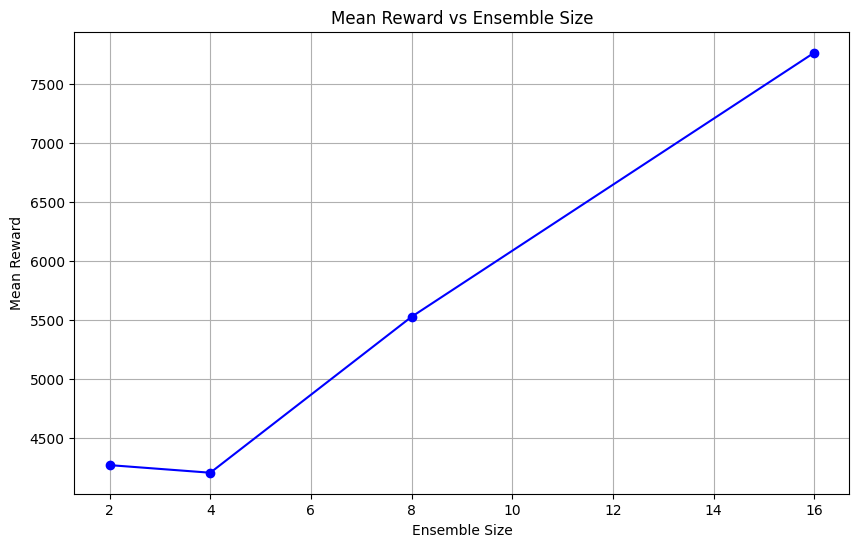

In [ ]:
import matplotlib.pyplot as plt

# Data from your results
ensemble_sizes = [2, 4, 8, 16]
mean_rewards = [sum(result)/len(result) for size, result in results.items()]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(ensemble_sizes, mean_rewards, marker='o', linestyle='-', color='b')
plt.title('Mean Reward vs Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('Mean Reward')
plt.grid(True)

# Show the plot
plt.show()
